In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

In [4]:
# Importing MBTI Dataset into Collab Environment
from google.colab import files
uploaded = files.upload()

Saving mbti_1.csv to mbti_1 (1).csv


In [5]:
# Converting uploaded dataset into a Pandas DataFrame
df = pd.read_csv('mbti_1.csv')

In [6]:
# Seeing the number of datapoints in each Label.
target_col = df.groupby(['type']).count()
print(target_col)

      posts
type       
ENFJ    190
ENFP    675
ENTJ    231
ENTP    685
ESFJ     42
ESFP     48
ESTJ     39
ESTP     89
INFJ   1470
INFP   1832
INTJ   1091
INTP   1304
ISFJ    166
ISFP    271
ISTJ    205
ISTP    337


In [7]:
# Visualising the first datapoint
df['posts'][0]


"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

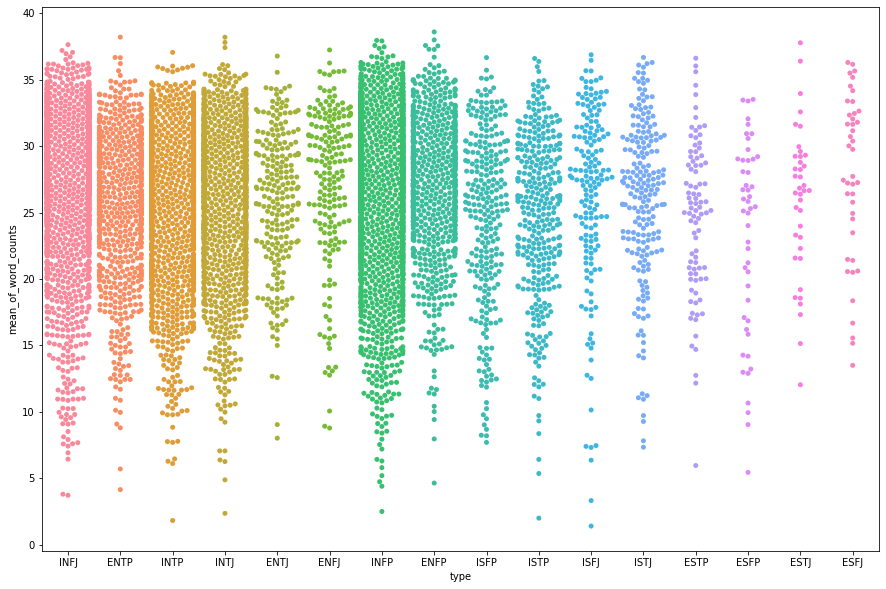

In [8]:
# Visualising using a Swarm Plot:
import seaborn as sb
# Swarm Plot
df1 = df.copy()
#this function counts the average number of words in each post of a user
def mean_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.mean(l)
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
#this function counts the no of words per post out of the total 50 posts in the whole row
df1['words_per_datapoint'] = df1['posts'].apply(lambda x: len(x.split()))
df1['avg_words_per_comment'] = df1['posts'].apply(lambda x: len(x.split())/50)
df1['mean_of_word_counts'] = df1['posts'].apply(lambda x: mean_row(x))
df1['var_of_word_counts'] = df1['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sb.swarmplot("type", "mean_of_word_counts", data=df1)

In [9]:
# Visualising the No of words per data-point, avg words per comment:
df1

,type,posts,words_per_datapoint,avg_words_per_comment,mean_of_word_counts,var_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,556,11.12,12.10,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,1170,23.40,24.38,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,836,16.72,17.70,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1064,21.28,22.26,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,967,19.34,20.32,196.4576
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,796,15.92,16.90,125.3300
8671,ENFP,'So...if this thread already exists someplace ...,1309,26.18,27.16,125.6144
8672,INTP,'So many questions when i do these things. I ...,948,18.96,19.94,169.7764
8673,INFP,'I am very conflicted right now when it comes ...,1705,34.10,35.08,57.0336


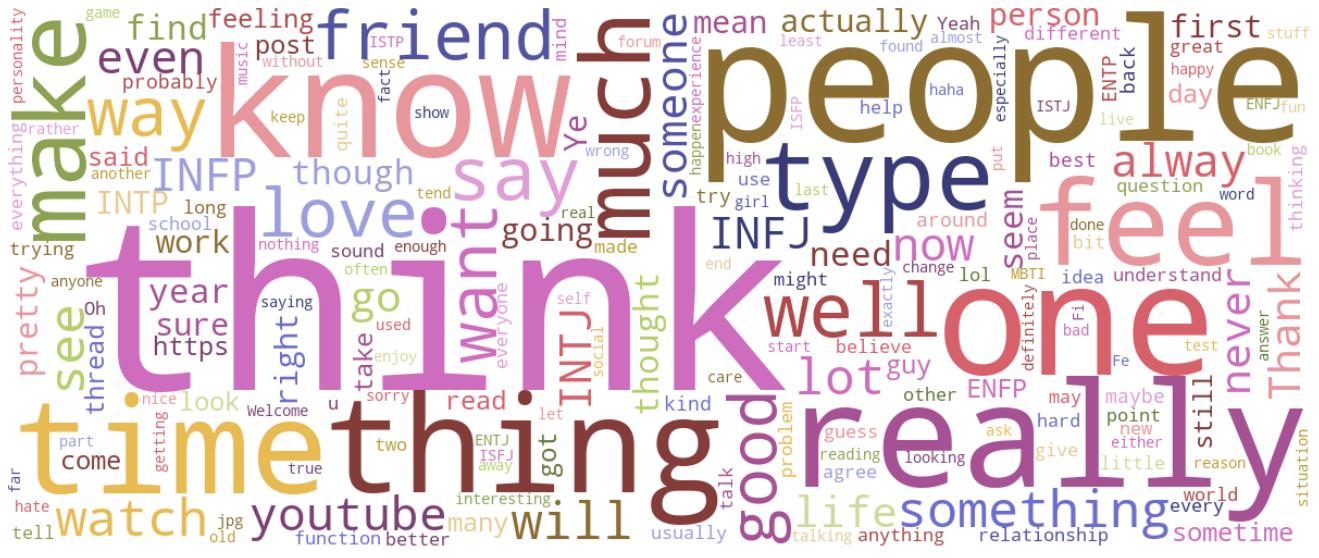

In [10]:
# Visulaising the dataset using the WordCloud:
from wordcloud import WordCloud 
from collections import Counter

#Plotting WordCloud.

#Finding the most common words in all posts.
words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]

most_common40 = Counter(words).most_common(40)
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [11]:
# Seeing the most common top 40 words in the dataset.
Counter(words).most_common(40)


[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

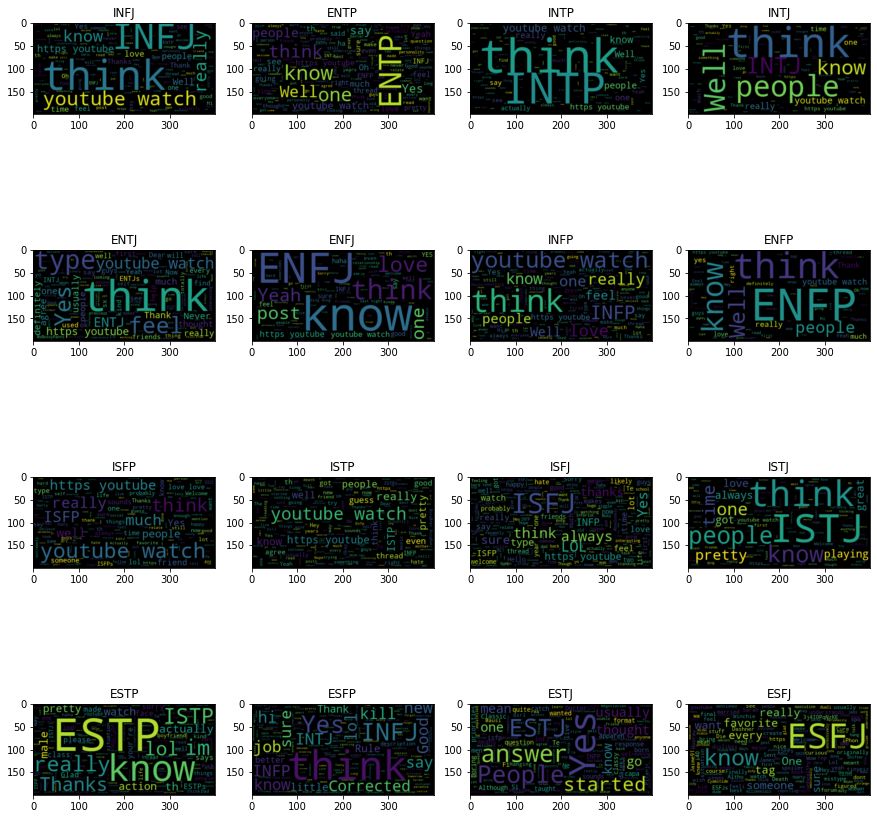

In [12]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(15,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [13]:
import re
import string
import math

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [16]:
print(df.info())
print("------------------------------------------------------------------------------------")
print(df['type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 203.3+ KB
None
------------------------------------------------------------------------------------
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


In [17]:
# Expanding Contractions
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df['posts'] = df['posts'].apply(lambda x:expand_contractions(x))

In [19]:
# Making the whole data in lower case
df['posts'] = df['posts'].str.lower()

In [20]:
df['posts'][0]

"'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.|||may the perc experience immerse you.|||the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206|||hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [21]:
#Define the text from which you want to replace the url with "".
def remove_URL(text):
    """Remove URLs from a text string"""
    return re.sub(r"http\S+", "", text)

# Removing URL's in the reviews
df['posts'] = df['posts'].apply(lambda x:remove_URL(x))


In [22]:
print(df.shape)

# removing Punctuations
punctuation = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)"""
print(punctuation)
#remove punctuation
df['posts'] = df['posts'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))


(8675, 2)
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)


In [23]:
df['posts'][0]

' and intj moments    sportscenter not top ten plays    prankswhat has been the most lifechanging experience in your life     on repeat for most of todaymay the perc experience immerse youthe last thing my infj friend posted on his facebook before committing suicide the next day rest in peace    enfj7 sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as84389  84390     welcome and stuff  game set matchprozac wellbrutin at least thirty minutes of moving your legs and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternativebasically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left byall things in moderation  sims is indeed a video game and a good one at that note 

In [24]:
#remove words and digits
# df['posts'] = df['posts'].apply(lambda x: re.sub('W*dw*','',x))

In [25]:
df['posts'][0]

' and intj moments    sportscenter not top ten plays    prankswhat has been the most lifechanging experience in your life     on repeat for most of todaymay the perc experience immerse youthe last thing my infj friend posted on his facebook before committing suicide the next day rest in peace    enfj7 sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as84389  84390     welcome and stuff  game set matchprozac wellbrutin at least thirty minutes of moving your legs and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternativebasically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left byall things in moderation  sims is indeed a video game and a good one at that note 

In [26]:
#remove stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['posts'] = df['posts'].apply(lambda x: remove_stopwords(x))

In [28]:
df['posts'][0]

'intj moments sportscenter top ten plays prankswhat lifechanging experience life repeat todaymay perc experience immerse youthe last thing infj friend posted facebook committing suicide next day rest peace enfj7 sorry hear distress natural relationship perfection time every moment existence try figure hard times times growth as84389 84390 welcome stuff game set matchprozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternativebasically come three items determined type whichever types want would likely use given types cognitive functions whatnot left byall things moderation sims indeed video game good one note good one somewhat subjective completely promoting death given simdear enfp favorite video games growing current favorite video games cool appears late sadtheres someone everyonewait thought confidence good thingi cherish time solitude bc revel within inner world whereas time id workin enjoy time dont worry

In [29]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df['posts'] = df['posts'].apply(lambda x: stem_words(x))

In [30]:
df['posts'][0]

'intj moment sportscent top ten play prankswhat lifechang experi life repeat todaymay perc experi immers youth last thing infj friend post facebook commit suicid next day rest peac enfj7 sorri hear distress natur relationship perfect time everi moment exist tri figur hard time time growth as84389 84390 welcom stuff game set matchprozac wellbrutin least thirti minut move leg mean move sit desk chair weed moder mayb tri edibl healthier alternativebas come three item determin type whichev type want would like use given type cognit function whatnot left byall thing moder sim inde video game good one note good one somewhat subject complet promot death given simdear enfp favorit video game grow current favorit video game cool appear late sadther someon everyonewait thought confid good thingi cherish time solitud bc revel within inner world wherea time id workin enjoy time dont worri peopl alway around toyo entp ladi complimentari personalitywel hey main social outlet xbox live convers even v

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['posts'] = df['posts'].apply(lambda text: lemmatize_words(text))

In [33]:
len(df['posts'][0])

1868

In [34]:
len(df['posts'].values)

8675

In [35]:
# Removal of Frequent words
# In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

# So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

# Let us get the most common words adn then remove them in the next step

In [36]:
from collections import Counter
cnt = Counter()
for text in df['posts'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('like', 73728),
 ('think', 56854),
 ('would', 50127),
 ('peopl', 45535),
 ('know', 38366),
 ('get', 37770),
 ('one', 37270),
 ('feel', 35671),
 ('realli', 34019),
 ('thing', 32963)]

In [37]:
target_names = np.unique(df['type'])
print(target_names)


['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [38]:
target_dic = dict(df['type'].value_counts())

In [39]:
target_dic.keys()

dict_keys(['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'ENTJ', 'ISTJ', 'ENFJ', 'ISFJ', 'ESTP', 'ESFP', 'ESFJ', 'ESTJ'])

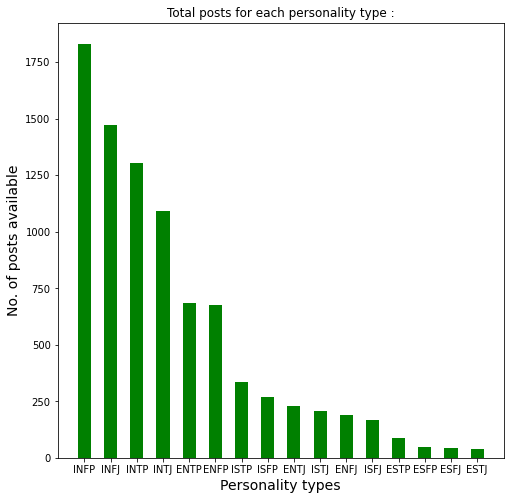

In [40]:
plt.figure(figsize=(8,8))
plt.bar(list(target_dic.keys()), list(target_dic.values()), color='g',width = 0.5)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type :')
plt.show()

<!-- # Above we can see that there is great unbalance in Introvert/Extrovert and Intuition/Sensing pairs.  -->
<!-- # Whereas Feeling/Thinking and Perception/Judgment pairs are quite balanced. -->

In [41]:
# Above we can see that there is great unbalance in Introvert/Extrovert and Intuition/Sensing pairs.
# Whereas Feeling/Thinking and Perception/Judgment pairs are quite balanced.

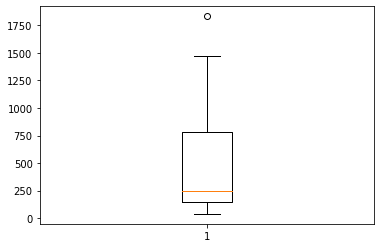

In [42]:
plt.boxplot(target_dic.values())
plt.show()

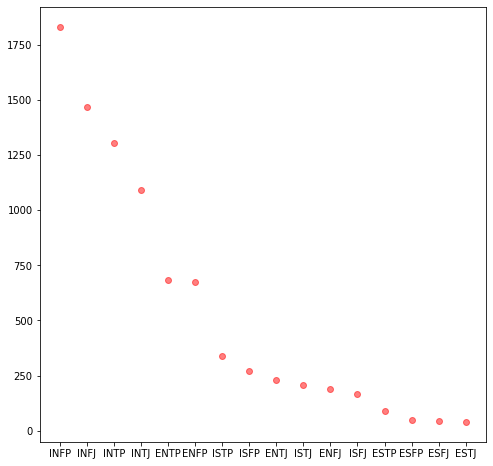

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(list(target_dic.keys()), list(target_dic.values()), color='r', alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

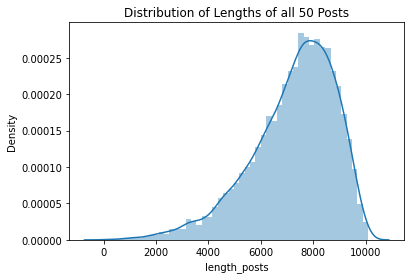

In [44]:
df1["length_posts"] = df1["posts"].apply(len)
sb.distplot(df1["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

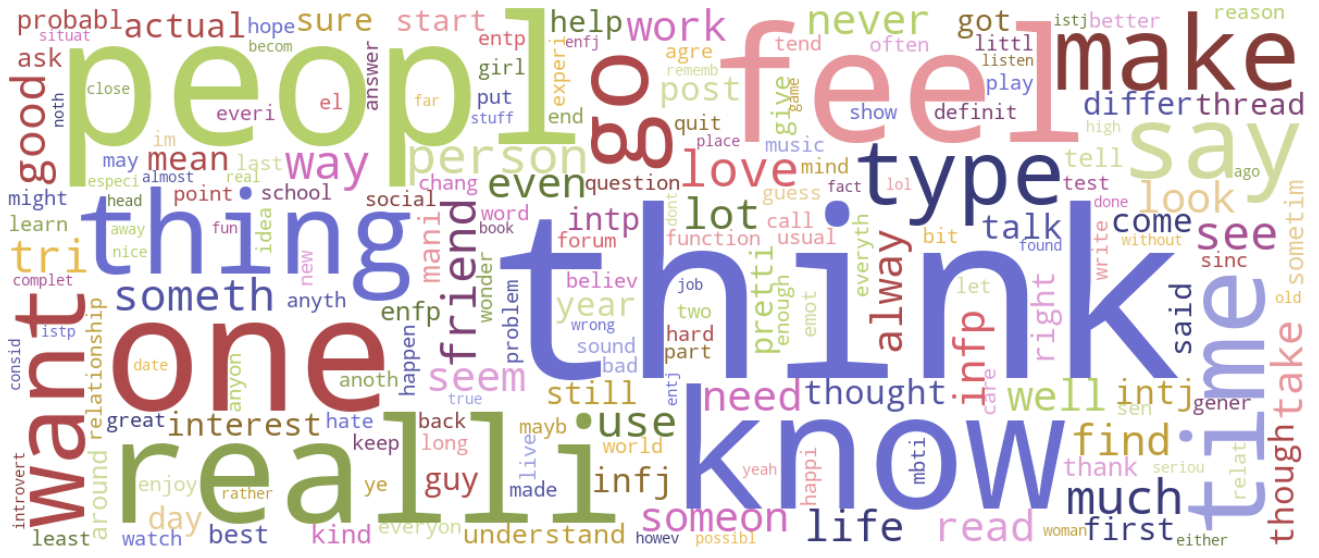

In [45]:
from wordcloud import WordCloud 
from collections import Counter

#Plotting WordCloud.

#Finding the most common words in all posts.
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]

most_common40 = Counter(words).most_common(40)
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

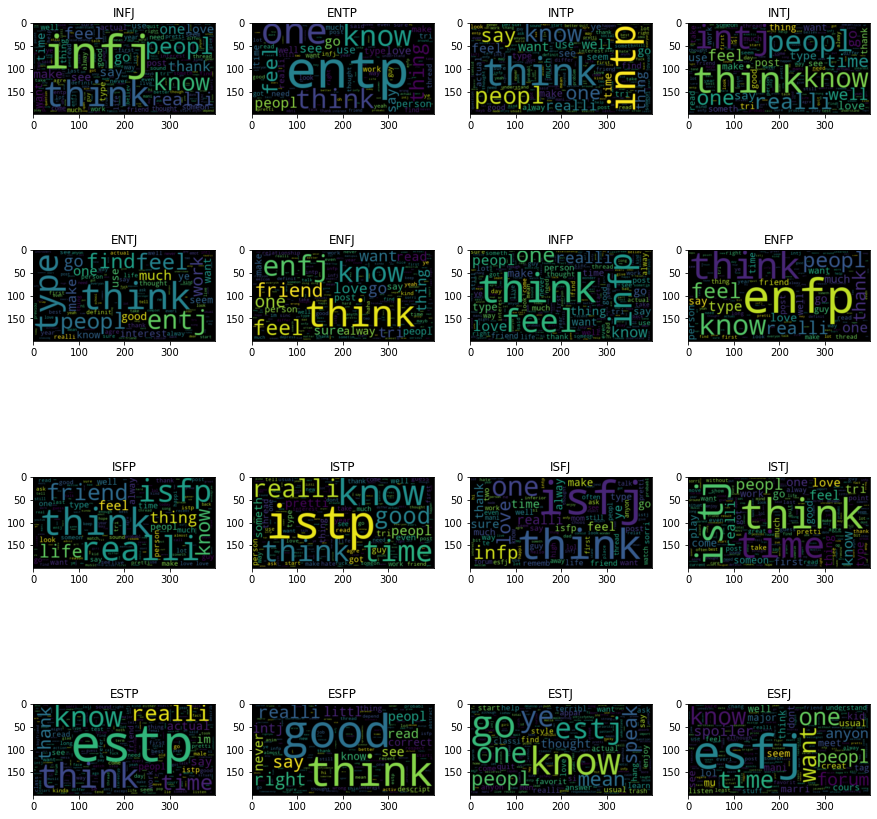

In [46]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

# Converting labels to Numeric Data:


In [47]:
df["type"].values

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [49]:
# Converting MBTI personality (or target or Y feature) into numerical form using Label Encoding
# encoding personality type
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
df['type of encoding'] = enc.fit_transform(df['type'])

target = df['type of encoding']


In [50]:
df

,type,posts,type of encoding
0,INFJ,intj moment sportscent top ten play prankswhat...,8
1,ENTP,find lack post alarmingsex bore posit often ex...,3
2,INTP,good one cours say know bless cursedo absolut ...,11
3,INTJ,dear intp enjoy convers day esoter gab natur u...,10
4,ENTJ,your firedthat anoth silli misconcept approach...,2
...,...,...,...
8670,ISFP,alway think cat fi dom reason websit becom neo...,13
8671,ENFP,soif thread alreadi exist someplac el heck del...,1
8672,INTP,mani question thing would take purpl pill pick...,11
8673,INFP,conflict right come want child honestli matern...,9


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# Converting posts (or training or X feature) into numerical form by count vectorization
train =  vect.fit_transform(df["posts"])

In [52]:
train.shape

(8675, 283192)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(train, df["type of encoding"], test_size=0.2, stratify=target, random_state=42)
print ((x_train.shape),(y_train.shape),(x_test.shape),(y_test.shape))

(6940, 283192) (6940,) (1735, 283192) (1735,)


In [54]:
x_train[0]

<1x283192 sparse matrix of type '<class 'numpy.int64'>'
	with 493 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [56]:
pip install xgboost

In [57]:
#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

In [58]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [59]:
accuracies = {}

#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(x_train, y_train)

# make predictions for test data
Y_pred = random_forest.predict(x_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Random Forest'] = accuracy* 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 33.49%


In [63]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, Y_pred))


[[ 13   1   1   0   0   0   0   0  10  11   1   0   0   0   0   1]
 [  2  74   1   4   0   0   0   0  11  24  11   3   1   0   1   3]
 [  0   1  11   4   0   0   0   0   4  14   9   2   0   0   0   1]
 [  0   8   0  74   0   0   0   0  13  14  10  16   0   2   0   0]
 [  0   0   0   0   1   0   0   0   6   2   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0   0   0   4   1   2   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   4   0   1   0   0   0   1]
 [  0   0   0   1   0   0   0   2   4   3   2   5   0   0   0   1]
 [  2   6   0   7   0   0   0   0 197  57   9  14   0   0   0   2]
 [  0   7   1   7   0   0   0   0  24 298   7  19   0   3   0   0]
 [  0   1   1   8   0   0   0   0  21  18 137  29   0   0   2   1]
 [  0   2   1   7   0   0   0   0   8  21  10 211   0   0   1   0]
 [  0   0   0   1   0   0   0   0   7   7   2   6   8   1   0   1]
 [  1   0   0   3   1   0   0   0   7  21   3   2   0  16   0   0]
 [  0   1   0   1   0   0   0   0   3  13   6   5   0   0  12 

In [60]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

Y_pred = xgb.predict(x_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['XG Boost'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.36%


In [61]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

Y_pred = svm.predict(x_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['SVM'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

confusion_matrix(y_test, predictions)

Accuracy: 62.36%


In [64]:
confusion_matrix(y_test, predictions)

array([[ 13,   1,   1,   0,   0,   0,   0,   0,  10,  11,   1,   0,   0,
          0,   0,   1],
       [  2,  74,   1,   4,   0,   0,   0,   0,  11,  24,  11,   3,   1,
          0,   1,   3],
       [  0,   1,  11,   4,   0,   0,   0,   0,   4,  14,   9,   2,   0,
          0,   0,   1],
       [  0,   8,   0,  74,   0,   0,   0,   0,  13,  14,  10,  16,   0,
          2,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   6,   2,   0,   0,   0,
          0,   0,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0,   0,   4,   1,   2,   0,
          0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   1,   4,   0,   1,   0,
          0,   0,   1],
       [  0,   0,   0,   1,   0,   0,   0,   2,   4,   3,   2,   5,   0,
          0,   0,   1],
       [  2,   6,   0,   7,   0,   0,   0,   0, 197,  57,   9,  14,   0,
          0,   0,   2],
       [  0,   7,   1,   7,   0,   0,   0,   0,  24, 298,   7,  19,   0,
          3,   0,   0],
       [  0,   1,   1,   8,   